Loading the required libraries

In [12]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

Importing the boston housing dataset from keras

In [13]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [14]:
# Printing the sizes of the datasets 
def print_size():
    print("X_train size is:", X_train.shape)
    print("X_test size is:", X_test.shape)
    print("y_train size is:", y_train.shape)
    print("y_test size is:", y_test.shape)
print_size()

X_train size is: (404, 13)
X_test size is: (102, 13)
y_train size is: (404,)
y_test size is: (102,)


In [15]:
# Checking the data values 
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [16]:
# Data preparation by scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
# Checking the scaled data
X_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [19]:
# Creating a neural network model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics='mae')

history=model.fit(X_train, y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 3ms/step - loss: 14.6833 - mae: 14.6833
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 5.0127 - mae: 5.0127
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 3.7358 - mae: 3.7358
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7398 - mae: 2.7398
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5995 - mae: 2.5995
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5099 - mae: 2.5099
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 2.5005 - mae: 2.5005
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3666 - mae: 2.3666
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 2.3365 - mae: 2.3365
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 2.4071 - mae: 2.4071
Epoch 11/500
13/13 [==============================] - 0s 

In [32]:
# display the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,421
Trainable params: 2,421
Non-trainable params: 0
_________________________________________________________________


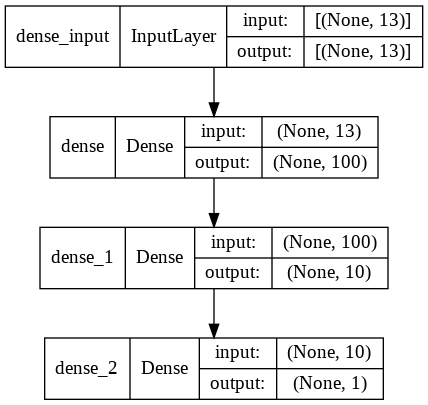

In [21]:
# Visualizing the model and its layers 
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Text(0, 0.5, 'Loss')

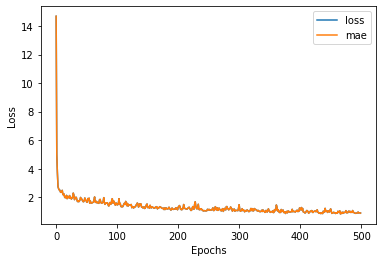

In [23]:
# Visualizing the model's performance 
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [29]:
y_test.mean()

23.07843137254902

In [30]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.3900 - mae: 2.3900


[2.3900070190429688, 2.3900070190429688]

In [27]:
# Evaluating the model's performance using mean absolute error and mean square error metrics
y_preds=tf.squeeze(model.predict(X_test))
def evaluate_model(train_data=X_train,
                   train_label=y_train,
                   test_data=X_test,
                   test_label=y_test,
                   predictions=y_preds):
    print("The mean absolute error of the model is: ", tf.keras.metrics.mean_absolute_error(y_test, y_preds).numpy())
    print("The mean squared error of the model is: ", tf.keras.metrics.mean_squared_error(y_test, y_preds).numpy())
evaluate_model()

The mean absolute error of the model is:  2.390007
The mean squared error of the model is:  12.230527


In [33]:
model.save("boston_housing_model.h5")